In [ ]:
import pandas as pd
import glob
import cv2
import matplotlib.pyplot as plt

def plot_preprocessing_steps(img_path,GaussianBlurKSize,GaussianBlurSigma,blockSize,C):
  f, ax = plt.subplots(2,3,figsize=(10,10))
  # f.set_size_inches(10, 10)

  #Read Image
  img = cv2.imread(img_path,-1)
  print(img.shape)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  ax[0,0].set_title('RGB')
  ax[0,0].imshow(img)

  #Image Resize
  re = cv2.resize(img, (256,256))
  print(re.shape)
  ax[0,1].set_title('Resize')
  ax[0,1].imshow(re,cmap='gray')

  gray = cv2.cvtColor(re, cv2.COLOR_RGB2GRAY)
  ax[0,2].set_title('Gray')
  ax[0,2].imshow(gray,cmap='gray')

  gaus = cv2.GaussianBlur(gray,(GaussianBlurKSize,GaussianBlurKSize),GaussianBlurSigma)
  ax[1,0].set_title('Gaussian Blur')
  ax[1,0].imshow(gaus,cmap='gray')

  adath = cv2.adaptiveThreshold(gaus,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,blockSize,C)
  ax[1,1].set_title('Adaptive Threshold')
  ax[1,1].imshow(adath,cmap='gray')

  ret, thr = cv2.threshold(adath, 70, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
  ax[1,2].set_title('Threshold')
  ax[1,2].imshow(thr,cmap='gray')


#Plot Orginal Images
def plot_folder(folder_path):
  images = sorted(glob.glob(folder_path+"/*.*", recursive=True))

  f, ax = plt.subplots(3,5)
  f.set_size_inches(20, 20)

  i = 0
  while(i!=15):
    for j in range(3):
      for z in range(5):
        #matplotlib read images in RGB not BGR
        image =plt.imread(images[i])
        ax[j,z].imshow(image)
        ax[j,z].set_yticklabels([])
        ax[j,z].set_xticklabels([])
        ax[j,z].set_title(images[i][images[i].rfind('/')+1:])
        i=i+1
  plt.tight_layout()

result = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ASL/Test_Results.csv')

In [ ]:
result.loc[result['File Name'] == 'K_IndoorDarkRoomWithFlashLight.jpg']

,File Name,Correctly Classified,True Label,Predicted Label,P(A),P(B),P(C),P(D),P(E),P(F),P(G),P(H),P(I),P(J),P(K),P(L),P(M),P(N),P(O),P(P),P(Q),P(R),P(S),P(T),P(U),P(V),P(W),P(X),P(Y)
105,K_IndoorDarkRoomWithFlashLight.jpg,False,K,R,0.0000000001,0.0395791530,0.0000237959,0.0012749602,0.0000000299,0.0000005224,0.0000000547,0.0000000025,0.0000002800,0.0000000000,0.2655758300,0.0000440561,0.0000000814,0.0000004671,0.0000003875,0.0002259841,0.0000417205,0.6757558000,0.0000112132,0.0000019800,0.0151856090,0.0010911628,0.0008157391,0.0000387215,0.0003324981


In [ ]:
plot_folder('/content/drive/MyDrive/Colab Notebooks/ASL/Our Dataset/before preprocessing/R')

(1176, 1176, 3)
(256, 256, 3)


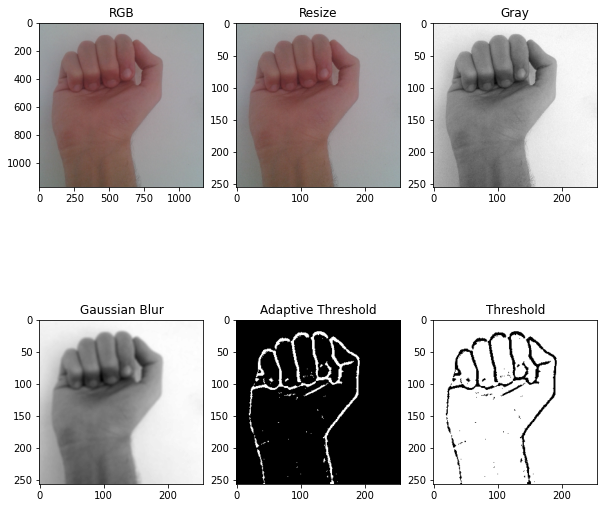

In [32]:
plot_preprocessing_steps('/content/drive/MyDrive/Colab Notebooks/ASL/Our Dataset/before preprocessing/A/A (1).jpg',5,2,11,2)

(1356, 1356, 3)
(256, 256, 3)


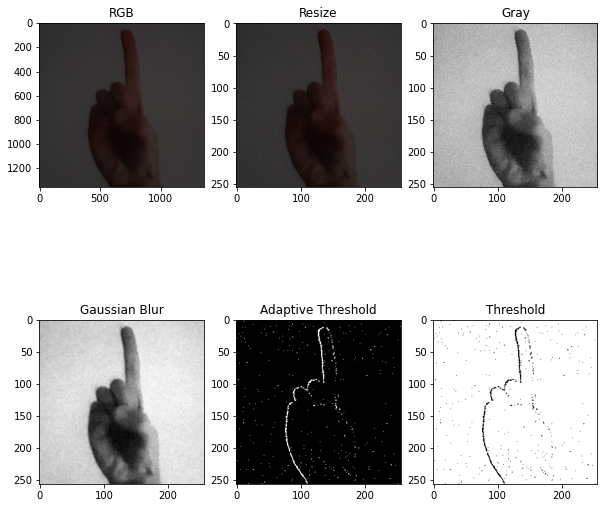

In [95]:
plot_preprocessing_steps('/content/drive/MyDrive/Colab Notebooks/ASL/Test Images/IndoorLowLight/D_IndoorLowLight.jpg',3,1,5,2)

(956, 956, 3)
(256, 256, 3)


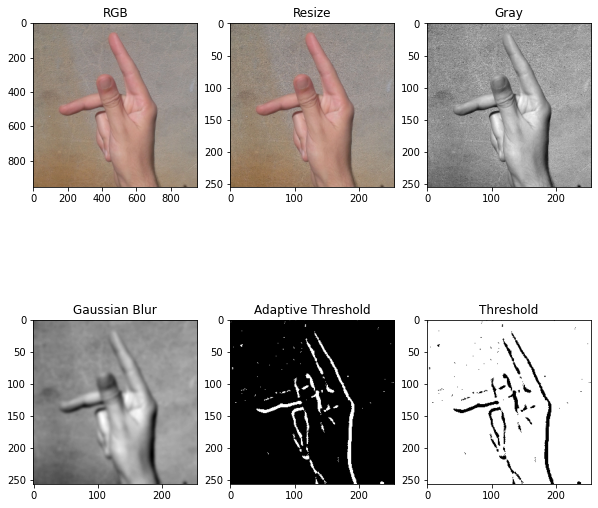

In [96]:
plot_preprocessing_steps('/content/drive/MyDrive/Colab Notebooks/ASL/Test Images/Outdoor1/K_Outdoor1.jpg',13,2,9,2)

In [ ]:
pd.set_option('display.float_format', lambda x: '%.10f' % x)

In [ ]:
pd.reset_option('display.float_format')